Exercise 1: Bar Graph
Objective: Create a bar graph representing the sales data of a retail company.
Tasks:
Use a fictional dataset where the x-axis represents product categories and the y-axis represents total sales amounts.
Customize the bar graph with appropriate labels for the axes, a title, and color.
Display the graph using Matplotlib.


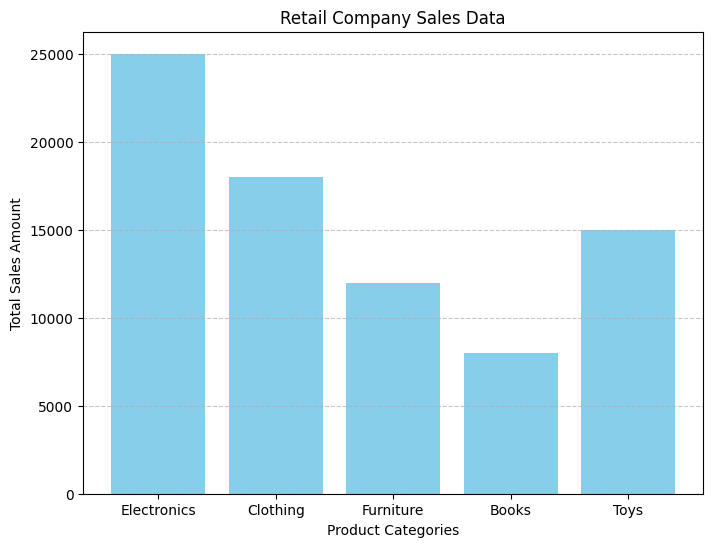

In [1]:
import matplotlib.pyplot as plt
product_categories = ['Electronics', 'Clothing', 'Furniture', 'Books', 'Toys']
sales_amounts = [25000, 18000, 12000, 8000, 15000]

# Create the bar graph
plt.figure(figsize=(8, 6))
plt.bar(product_categories, sales_amounts, color='skyblue')

# Customize the graph
plt.xlabel('Product Categories')
plt.ylabel('Total Sales Amount')
plt.title('Retail Company Sales Data')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Exercise 2: Hierarchical Indexing
Objective: Filter and retrieve all days when the temperature exceeded 30°C (86°F) for cities in Canada using hierarchical indexing.
Tasks:
Create a pandas DataFrame with hierarchical indexing on ‘Country’, ‘City’, and ‘Date’.
Write Python code to filter the dataset for the specified condition.
Explain how hierarchical indexing simplifies multi-level data analysis.


In [3]:
import pandas as pd
data = {
    'Country': ['Canada', 'Canada', 'USA', 'Canada', 'USA', 'Canada'],
    'City': ['Toronto', 'Montreal', 'New York', 'Vancouver', 'Los Angeles', 'Calgary'],
    'Date': ['2024-07-01', '2024-07-02', '2024-07-03', '2024-07-04', '2024-07-05', '2024-07-06'],
    'Temperature': [28, 32, 35, 25, 29, 31]
}
df = pd.DataFrame(data)
df = df.set_index(['Country', 'City', 'Date'])
hot_days_canada = df[(df.index.get_level_values('Country') == 'Canada') & (df['Temperature'] > 30)]
hot_days_canada
# Explanation:
# Hierarchical indexing allows us to organize data in multiple levels (Country, City, and Date in this case) using index labels.
# This makes it efficient to filter or query data based on multiple levels at the same time. Instead of using multiple boolean conditions,
# you can use .index.get_level_values() to access the specific levels of the index.
# In this example, the code directly queries the 'Country' and 'Temperature' information through the multi-index without iterating or creating intermediary conditions.


Temperature
Country City     Date                   
Canada  Montreal 2024-07-02           32
        Calgary  2024-07-06           31

Exercise 3: Advanced Filtering with Hierarchical Indices
Objective: Filter rows in a hierarchical DataFrame based on specific criteria.
Tasks:
Use the DataFrame from Exercise 4 of the XP exercises.
Write Python code to filter and display rows where ‘Salary’ is above 50,000 within each ‘Department’.
Demonstrate how hierarchical indexing facilitates efficient filtering.


In [5]:
data = {
    'Department': ['Sales', 'Sales', 'Marketing', 'Marketing', 'Engineering', 'Engineering'],
    'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank'],
    'Salary': [60000, 45000, 70000, 55000, 80000, 65000]
}
df_company= pd.DataFrame(data)
df_company= df_company.set_index(['Department', 'Employee'])
filtered_df = df_company[df_company['Salary'] > 50000]
filtered_df

# Explanation
# Hierarchical indexing makes this filtering process efficient.
# We can filter on 'Salary' without needing to explicitly group by 'Department', as the index structure handles the grouping implicitly.
# The resulting DataFrame `filtered_df` contains only rows where the salary exceeds the threshold, organized by department and employee.


Salary
Department  Employee        
Sales       Alice      60000
Marketing   Charlie    70000
            David      55000
Engineering Eve        80000
            Frank      65000

Exercise 4: Visualizing Movie Durations
Objective: Create a distribution plot to visualize the durations of MCU movies.
Tasks:
Import necessary libraries (pandas, Seaborn, Matplotlib).
Load a dataset containing MCU movie information.
Use Seaborn’s distplot or histplot to visualize the distribution of movie durations.
Add a KDE overlay and customize the plot with a title.
Display the plot.



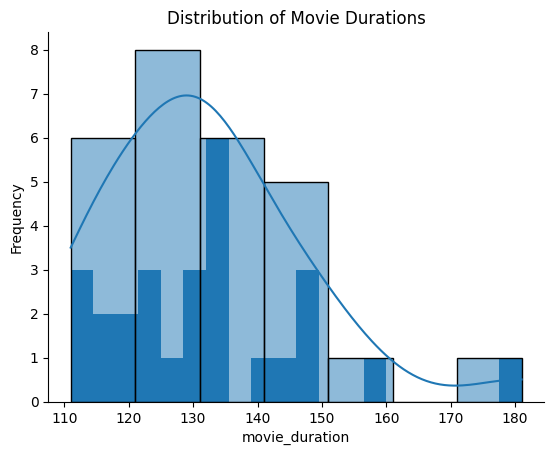

In [16]:
import seaborn as sns
df_movies = pd.read_csv('mcu.csv')
df_movies.head(5)
df_movies['movie_duration'].plot(kind='hist', bins=20, title='movie_duration')
plt.gca().spines[['top', 'right',]].set_visible(False)
sns.histplot(df_movies['movie_duration'], kde=True)
plt.title('Distribution of Movie Durations')
plt.show()

Exercise 5: Box Plot of Audience and Tomato Meter Scores
Objective: Compare the distribution of Tomato Meter scores and Audience scores using a box plot.
Tasks:
Create a new DataFrame that melts the Tomato Meter and Audience scores into a long format.
Use Seaborn’s boxplot to visualize the distributions of both scores.
Customize the plot by setting an appropriate color palette and adding a title.
Display the plot.


<ipython-input-21-76cb601ed049>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Score Type', y='Score', data=df_melted, palette='pastel')
<ipython-input-21-76cb601ed049>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = plt.legend(title='Score Type')


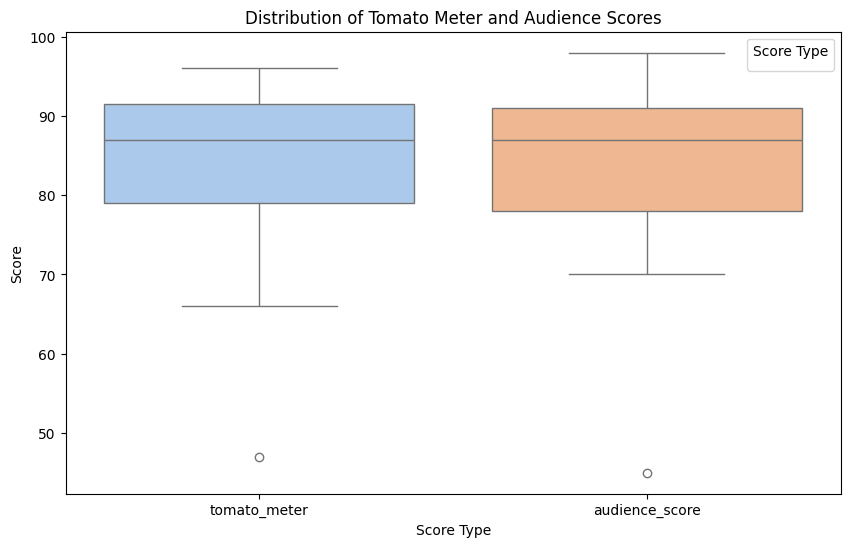

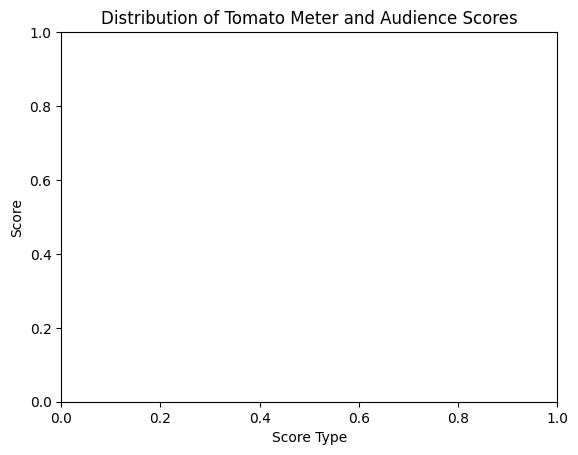

In [21]:
df_melted = pd.melt(df_movies, id_vars=['movie_title'], value_vars=['tomato_meter', 'audience_score'],
                    var_name='Score Type', value_name='Score')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score Type', y='Score', data=df_melted, palette='pastel')
legend = plt.legend(title='Score Type')
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.title('Distribution of Tomato Meter and Audience Scores')
plt.show()
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.title('Distribution of Tomato Meter and Audience Scores')
plt.show()


Exercise 6: Pair Plot of Financial Data
Objective: Use Seaborn’s pairplot to explore relationships between financial aspects of MCU movies.
Tasks:
Select relevant columns for analysis (e.g., Production Budget, Opening Weekend, Domestic Box Office, Worldwide Box Office).
Convert financial data from string to numeric if needed.
Use Seaborn’s pairplot to visualize pairwise relationships between the selected metrics.
Set hue based on the MCU phase (e.g., mcu_phase) to identify patterns related to movie phases.
Customize the plot and display it.


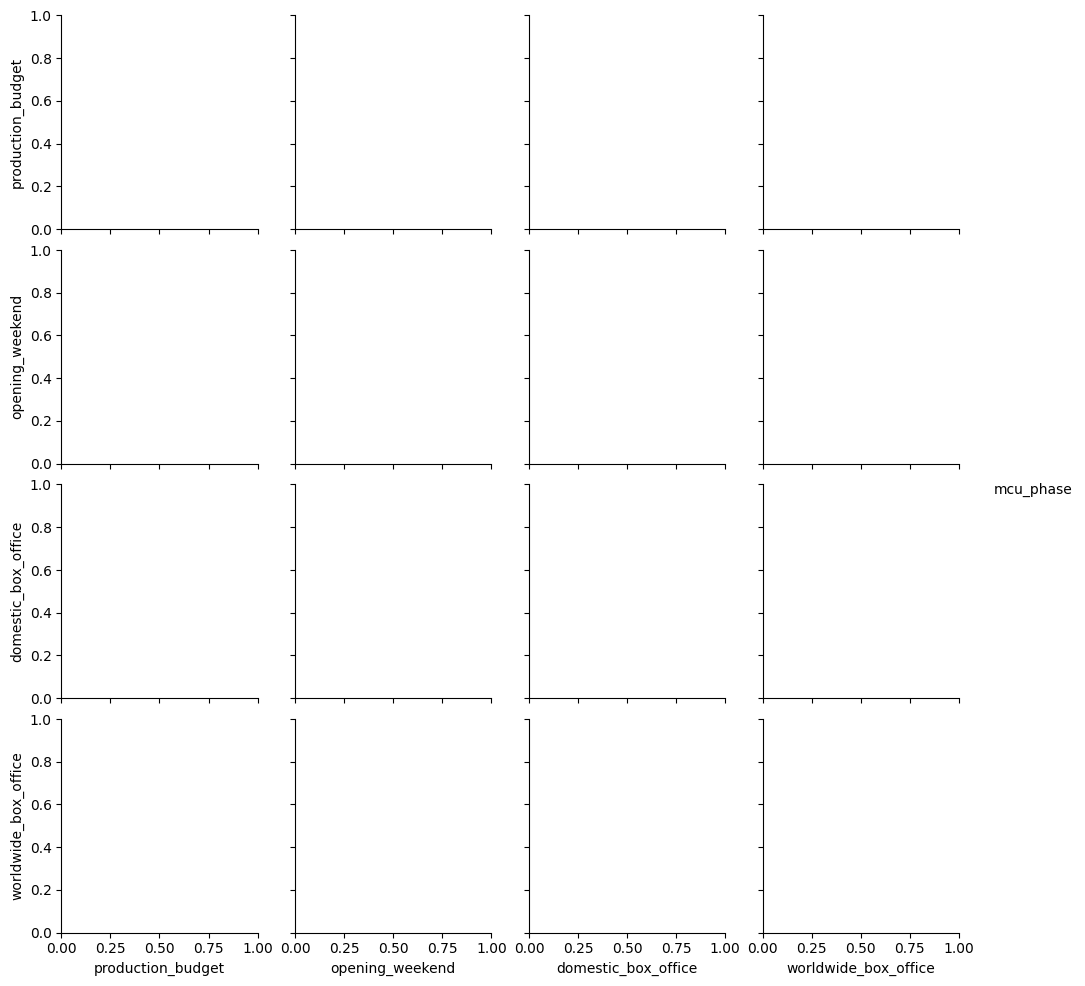

In [25]:
for col in ['production_budget', 'opening_weekend', 'domestic_box_office', 'worldwide_box_office']:
    df_movies[col] = pd.to_numeric(df_movies[col], errors='coerce')
financial_cols = ['production_budget', 'opening_weekend', 'domestic_box_office', 'worldwide_box_office']
sns.pairplot(df_movies, vars=financial_cols, hue='mcu_phase')
plt.show()